In [6]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch import nn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm.autonotebook import tqdm
import pandas as pd
from utils import moveTo

In [2]:
def train_simple_network(model, loss_func, training_loader, epochs=20, device="gpu"):
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epoch"):
        model = model.train()
        running_loss = 0.0

        for inputs, labels in tqdm(training_loader, desc="Batch", leave=False):
            inputs = moveTo(inputs, device)
            labels = moveTo(labels, device)
            optimizer.zero_grad()
            y_hat = model(inputs)
            loss = loss_func(y_hat, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()


<Axes: >

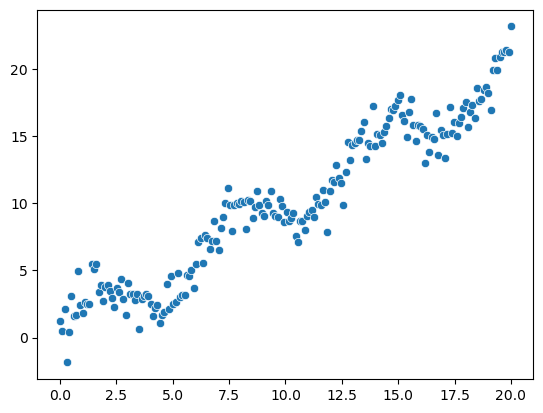

In [3]:
X = np.linspace(0, 20, num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)
sns.scatterplot(x=X, y=y)

In [8]:
class Simple1DRegressionDataset(Dataset):
    def __init__(self, X, y):
        super(Simple1DRegressionDataset, self).__init__()
        self.X = X.reshape(-1, 1)
        self.y = y.reshape(-1, 1)

    def __getitem__(self, index):
        return torch.tensor(self.X[index,:], dtype=torch.float32), torch.tensor(self.y[index], dtype=torch.float32)
    
    def __len__(self):
        return self.X.shape[0]
    
training_loader = DataLoader(Simple1DRegressionDataset(X, y), shuffle=True)

In [17]:
model = nn.Sequential(
    nn.Linear(1, 10),
    nn.Tanh(),
    nn.Linear(10, 1)
)
loss_func = nn.MSELoss()

device = torch.device("cuda")
train_simple_network(model, loss_func, training_loader, device=device)

Epoch: 100%|██████████| 20/20 [00:01<00:00, 11.19it/s]


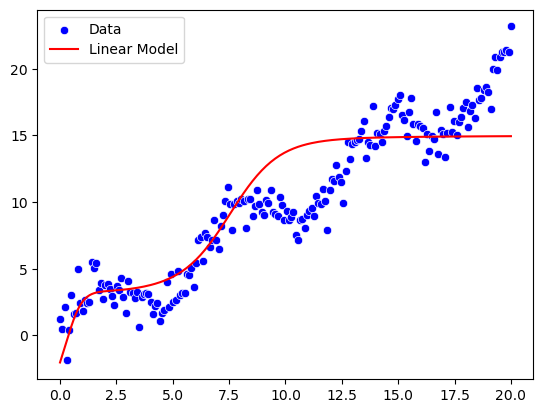

In [18]:
with torch.no_grad():
    Y_pred = model(torch.tensor(X.reshape(-1, 1), device=device, dtype=torch.float32)).cpu().numpy()
    sns.scatterplot(x=X, y=y, color='blue', label='Data')
    sns.lineplot(x=X, y=Y_pred.ravel(), color='red', label='Linear Model')